In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('data/clean_data_rmv_miss_values.csv')

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_APARTMENT,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,9704507,280000.0,6.0,2.0,3.0,0,3.0,557.0,120.0,0,...,0,0,0,0,0,0,0,1,1.0,1
1,9677762,300000.0,2.0,0.0,4.0,0,3.0,4290.0,172.0,0,...,0,0,0,0,0,0,0,0,1.0,1
2,9536498,249000.0,4.0,1.0,2.0,0,4.0,780.0,195.0,0,...,0,0,0,0,0,0,0,0,0.0,1
3,9621908,525000.0,2.0,1.0,3.0,0,4.0,2195.0,365.0,0,...,0,0,0,0,0,0,0,0,1.0,0
4,9517190,1750000.0,6.0,2.0,5.0,0,4.0,11307.0,1200.0,0,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,9581856,279000.0,4.0,1.0,3.0,0,2.0,795.0,180.0,0,...,0,0,0,0,0,0,0,0,1.0,0
1906,9551452,340000.0,3.0,1.0,4.0,0,3.0,320.0,280.0,0,...,0,0,0,0,0,0,0,0,1.0,0
1907,9581892,235000.0,2.0,1.0,6.0,0,2.0,149.0,150.0,0,...,0,0,1,0,0,0,0,0,0.0,0
1908,9499280,595000.0,3.0,1.0,5.0,0,2.0,160.0,520.0,0,...,0,0,0,0,0,0,0,0,0.0,0


In [3]:
df = df.drop(columns='Immoweb ID')

df

,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_APARTMENT,Property type_HOUSE,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,280000.0,6.0,2.0,3.0,0,3.0,557.0,120.0,0,1,...,0,0,0,0,0,0,0,1,1.0,1
1,300000.0,2.0,0.0,4.0,0,3.0,4290.0,172.0,0,1,...,0,0,0,0,0,0,0,0,1.0,1
2,249000.0,4.0,1.0,2.0,0,4.0,780.0,195.0,0,1,...,0,0,0,0,0,0,0,0,0.0,1
3,525000.0,2.0,1.0,3.0,0,4.0,2195.0,365.0,0,1,...,0,0,0,0,0,0,0,0,1.0,0
4,1750000.0,6.0,2.0,5.0,0,4.0,11307.0,1200.0,0,1,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,279000.0,4.0,1.0,3.0,0,2.0,795.0,180.0,0,1,...,0,0,0,0,0,0,0,0,1.0,0
1906,340000.0,3.0,1.0,4.0,0,3.0,320.0,280.0,0,1,...,0,0,0,0,0,0,0,0,1.0,0
1907,235000.0,2.0,1.0,6.0,0,2.0,149.0,150.0,0,1,...,0,0,1,0,0,0,0,0,0.0,0
1908,595000.0,3.0,1.0,5.0,0,2.0,160.0,520.0,0,1,...,0,0,0,0,0,0,0,0,0.0,0


In [4]:
df.corr()

,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_APARTMENT,Property type_HOUSE,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
Price,1.000000,0.248072,0.275887,0.398408,0.042897,0.138100,0.354607,0.602717,NaN,NaN,...,-0.001359,-0.026374,0.002671,0.035257,-0.045302,-0.008890,-0.037789,-0.034280,0.069980,0.003539
Building condition,0.248072,1.000000,0.463281,0.026288,0.075987,0.119743,0.016255,0.096752,NaN,NaN,...,-0.017471,0.022621,0.009531,0.035018,0.018906,0.025275,-0.086026,0.012679,0.196218,0.099910
Kitchen type,0.275887,0.463281,1.000000,0.066455,0.068470,0.142712,0.048429,0.138898,NaN,NaN,...,0.001283,0.042857,0.016550,-0.003973,-0.046385,-0.019901,-0.082750,0.010358,0.220393,0.030015
Bedrooms,0.398408,0.026288,0.066455,1.000000,0.100771,0.049060,0.146973,0.518403,NaN,NaN,...,0.016922,-0.041592,0.055960,-0.021532,0.079792,-0.015406,-0.009320,-0.023831,0.046050,0.014697
Furnished,0.042897,0.075987,0.068470,0.100771,1.000000,-0.005088,0.019253,0.051157,NaN,NaN,...,-0.011281,0.008144,-0.021402,0.008071,0.066534,-0.008400,-0.011281,-0.019633,0.029486,0.005301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City_Veurne,-0.008890,0.025275,-0.019901,-0.015406,-0.008400,0.012871,-0.015261,-0.033712,NaN,NaN,...,-0.003525,-0.006135,-0.006688,-0.009226,-0.009066,1.000000,-0.003525,-0.006135,-0.033164,-0.000439
City_Virton,-0.037789,-0.086026,-0.082750,-0.009320,-0.011281,-0.031268,-0.011912,0.043615,NaN,NaN,...,-0.004734,-0.008239,-0.008982,-0.012391,-0.012177,-0.003525,1.000000,-0.008239,-0.037884,0.008791
City_Waremme,-0.034280,0.012679,0.010358,-0.023831,-0.019633,0.055120,0.028096,-0.012421,NaN,NaN,...,-0.008239,-0.014339,-0.015631,-0.021565,-0.021191,-0.006135,-0.008239,1.000000,0.020956,0.069713
Terrace_Combined,0.069980,0.196218,0.220393,0.046050,0.029486,0.096952,-0.005047,0.022317,NaN,NaN,...,0.012041,-0.017660,0.050470,-0.025108,0.003665,-0.033164,-0.037884,0.020956,1.000000,0.110050


### Find largest correlation variables (attributes) with target (price)

In [5]:
price_corr = df.corr()['Price']

price_corr_10 = price_corr[np.argsort(price_corr, axis=0)[::-1]]

In [6]:
print('Top 10 positive correlation are:')
print(price_corr_10.head(10))
print('.....................................')
print('Top 10 negative correlation are:')
print(price_corr_10.tail(10))


Top 10 positive correlation are:
Price                       1.000000
Living area                 0.602717
Bedrooms                    0.398408
Surface of the plot         0.354607
Kitchen type                0.275887
Post code_7784                   NaN
property sub-type_CHALET   -0.082704
Building condition          0.248072
Post code_1070              0.008985
Post code_2547              0.006640
Name: Price, dtype: float64
.....................................
Top 10 negative correlation are:
garden_label                     0.003539
garden_label                     0.003539
Post code_7750                        NaN
property sub-type_BUNGALOW      -0.114439
Post code_8211                  -0.008939
Property type_APARTMENT               NaN
Post code_7900                  -0.024328
Post code_7812                  -0.029524
property sub-type_FARMHOUSE     -0.036280
property sub-type_FLAT_STUDIO         NaN
Name: Price, dtype: float64


In [7]:
df['Building condition'].corr(df['Price'])

0.24807185793358574

### Scatter Plots

Text(0.5, 1.0, 'Bedrooms vs Price')

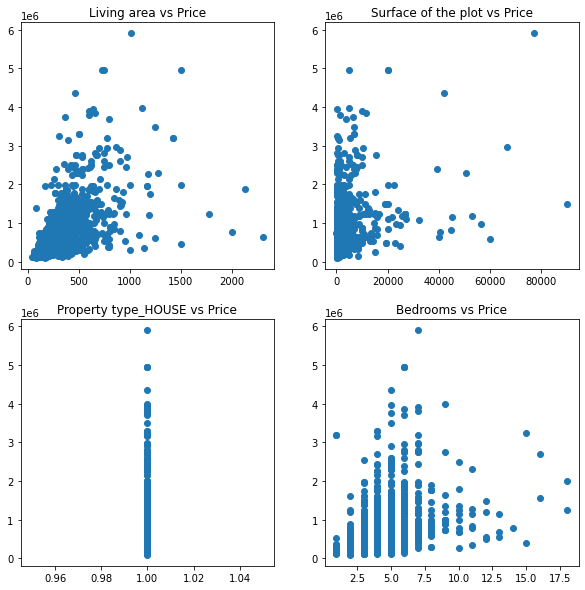

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].scatter(df['Living area'], df['Price'])
axs[0, 0].set_title('Living area vs Price')
axs[0, 1].scatter(df['Surface of the plot'], df['Price'])
axs[0, 1].set_title('Surface of the plot vs Price')
axs[1, 0].scatter(df['Property type_HOUSE'], df['Price'])
axs[1, 0].set_title('Property type_HOUSE vs Price')
axs[1, 1].scatter(df['Bedrooms'], df['Price'])
axs[1, 1].set_title('Bedrooms vs Price')

### Multiple Linear Regression

#### Multiple Regression with all variables except City

In [64]:
#X = df.drop(df.columns[df.columns.str.contains('Post code')], axis=1, inplace=True)
#X = df.loc[:, ~df.columns.str.contains('^City', case=True)]

#X = df.drop(df.filter(regex='City').columns, axis=1)
X = df.drop(df.filter(regex='Post code').columns, axis=1)
X = X.drop(df.filter(regex='Property type'), axis=1)
X = X.drop(df.filter(regex='property sub-type'), axis=1)
X = X.drop(columns=['Price', 'Bedrooms', 'Building condition', 'Kitchen type', 'Furnished', 'Number of frontages',
                    'Terrace_Combined', 'garden_label'])
y = df.Price

X

,Surface of the plot,Living area,City_Aalst,City_Antwerpen,City_Arlon,City_Arrondissement Brussel-Hoofdstad,City_Ath,City_Bastogne,City_Brugge,City_Charleroi,...,City_Soignies,City_Thuin,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme
0,557.0,120.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4290.0,172.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,780.0,195.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2195.0,365.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11307.0,1200.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,795.0,180.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1906,320.0,280.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1907,149.0,150.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1908,160.0,520.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1432, 45)
(478, 45)
(1432,)
(478,)


In [69]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

regressor.score(X_train, y_train)

0.5297967644981146

In [70]:
regressor.score(X_test, y_test)

0.5336607943799506

#### Multiple Regression with all variables except Post code

In [13]:
#X = df.drop(df.columns[df.columns.str.contains('Post code')], axis=1, inplace=True)
X = df.loc[:, ~df.columns.str.startswith('Post code_')]
#X = df.drop(df.filter(regex='City').columns, axis=1)
X = X.drop(columns=['Price', 'Bedrooms'])
y = df.Price

X

,Building condition,Kitchen type,Furnished,Number of frontages,Surface of the plot,Living area,Property type_APARTMENT,Property type_HOUSE,property sub-type_BUNGALOW,property sub-type_CASTLE,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,6.0,2.0,0,3.0,557.0,120.0,0,1,0,0,...,0,0,0,0,0,0,0,1,1.0,1
1,2.0,0.0,0,3.0,4290.0,172.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,1
2,4.0,1.0,0,4.0,780.0,195.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,1
3,2.0,1.0,0,4.0,2195.0,365.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
4,6.0,2.0,0,4.0,11307.0,1200.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,4.0,1.0,0,2.0,795.0,180.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
1906,3.0,1.0,0,3.0,320.0,280.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
1907,2.0,1.0,0,2.0,149.0,150.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0.0,0
1908,3.0,1.0,0,2.0,160.0,520.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1432, 72)
(478, 72)
(1432,)
(478,)


In [15]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

regressor.score(X_train, y_train)

0.6062902731866218

In [16]:
regressor.score(X_test, y_test)

0.5769960138035268

#### Multiple Linear Regression with highest influential variables

In [17]:
x_1 = df['Living area'].to_numpy().reshape(-1,1)
x_2 = df['Surface of the plot'].to_numpy()
#x_3 = df['Bedrooms'].to_numpy()
#x_4 = df['Property type_HOUSE'].to_numpy()

#x_5 = df['Property type_APARTMENT'].to_numpy()
#x_6 = df['property sub-type_FLAT_STUDIO'].to_numpy()
#x_7 = df['property sub-type_GROUND_FLOOR'].to_numpy()
y = df.Price.to_numpy()

X = x_1
#X = np.column_stack((x_1, x_2, x_3, x_4, x_5, x_6, x_7))
#X = np.column_stack((x_1, x_2, x_4, x_5, x_6, x_7))
#X = np.column_stack((x_1, x_2))

print(X.shape)
print(y.shape)

(1910, 1)
(1910,)


In [18]:
#plt.scatter(X, y)
#plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1432, 1)
(478, 1)
(1432,)
(478,)


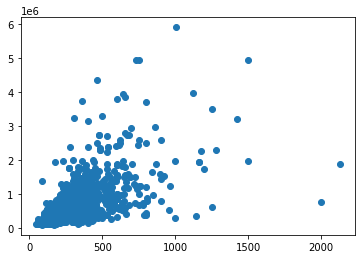

In [20]:
plt.figure()
plt.scatter(X_train, y_train)

In [21]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

regressor.score(X_train, y_train)

0.38121067760420246

In [22]:
regressor.score(X_test, y_test)

0.2890422114372013

### Polynomial Regression

In [23]:
degree = 2

In [24]:
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [25]:
polyreg.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [26]:
polyreg.predict(X_test)

array([1202563.91680808,  995920.8166688 ,  251602.54434187,
        581718.59776171,  276279.46517943,  849634.36103223,
        710691.69328793,  894281.41896236, 1006462.60429662,
        938094.89456683,  894281.41896236,  173750.41262442,
        410299.63500669,  226756.82308337,  248850.24446974,
        333202.50105228, 1800716.07693053,  343940.78628498,
        317032.55452882,  682002.89082737,  462448.9338677 ,
        449489.75749548,  330512.71985458, 2064119.27130606,
        564246.78461275,  410299.63500669, 1074731.76234481,
        985326.93014562, 1373557.46299005, 1559760.37395249,
        826998.23869505,  860874.27385779,  826998.23869505,
        981074.78784564,  710691.69328793,  151206.85678219,
        330512.71985458,  662710.30605519,  546672.8576289 ,
        551704.39940336, 1162227.08525992,  608967.99251305,
       1122956.63333027,  616355.88255495,  521390.11140777,
        589175.25834548, 1614921.98329137,  381262.20616682,
        650584.71200863,

In [27]:
polyreg.score(X_train, y_train)

0.4055453566628341

In [28]:
polyreg.score(X_test, y_test)

0.4466074653317037

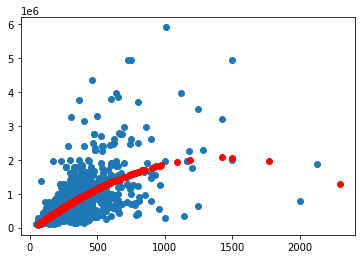

In [29]:
plt.figure()
plt.scatter(X_train, y_train)
plt.scatter(X_test, polyreg.predict(X_test), c='red')
plt.show()

### Create a class/function to do backward selection

https://www.youtube.com/watch?v=Nv6e9S8fwzA

https://towardsdatascience.com/multiple-linear-regression-8cf3bee21d8b

## Rough Work

In [30]:
for i in df_key.columns:
    if i == 'Price':
        continue
    plt.scatter(df_key.Price, df_key[i])

plt.tight_layout()
plt.show()

NameError: name 'df_key' is not defined

In [ ]:
plt.scatter(df.Price, df['Living area'])

plt.tight_layout()
plt.show()

In [ ]:
x_1 = 

In [ ]:
X = df_key.drop(columns=['Price']).to_numpy().reshape(-1,1)
y = df_key.Price.to_numpy()

In [ ]:
X

In [ ]:
k = 10
corrmat = df.corr()
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df[cols].values.T)

fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, ax=ax)
plt.show()

## To be removed

####  Create a smaller dataframe with most influential variables and target

In [ ]:
df_key = df[['Price', 'Living area', 'Surface of the plot', 'Bedrooms', 'Property type_HOUSE', 
             'property sub-type_CASTLE', 'property sub-type_VILLA', 'Number of frontages', 
             'property sub-type_EXCEPTIONAL_PROPERTY', 'Post code_8300']]

df_key

In [ ]:
df_key['Living area'].corr(df_key['Price'])